In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_excel("/content/Clustering_ex.xlsx.xlsx")
df

,Variable_1,Variable_2
0,12,30
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


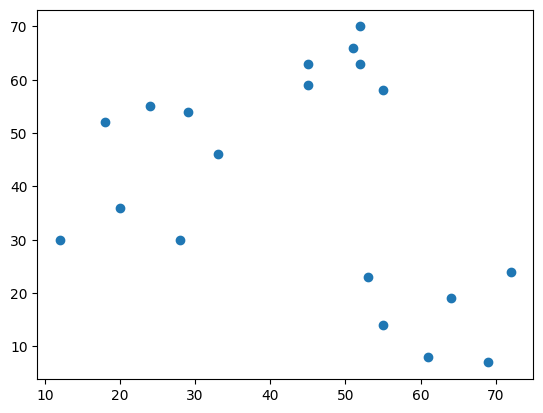

In [8]:
plt.scatter(df['Variable_1'],df['Variable_2'])

In [10]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [17]:
scaler = MinMaxScaler()
scaler.fit(df[['Variable_1']])
df['Variable_1'] = scaler.transform(df[['Variable_1']])

scaler.fit(df[['Variable_2']])
df['Variable_2'] = scaler.transform(df[['Variable_2']])
df

,Variable_1,Variable_2,cluster
0,0.000000,0.365079,2
1,0.133333,0.460317,2
2,0.266667,0.365079,2
3,0.100000,0.714286,2
4,0.283333,0.746032,2
5,0.350000,0.619048,2
6,0.200000,0.761905,2
7,0.550000,0.825397,0
8,0.550000,0.888889,0
9,0.666667,1.000000,0


In [18]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['Variable_1','Variable_2']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [19]:
df['cluster'] = y_pred
df

,Variable_1,Variable_2,cluster
0,0.000000,0.365079,0
1,0.133333,0.460317,0
2,0.266667,0.365079,0
3,0.100000,0.714286,0
4,0.283333,0.746032,0
5,0.350000,0.619048,0
6,0.200000,0.761905,0
7,0.550000,0.825397,2
8,0.550000,0.888889,2
9,0.666667,1.000000,2


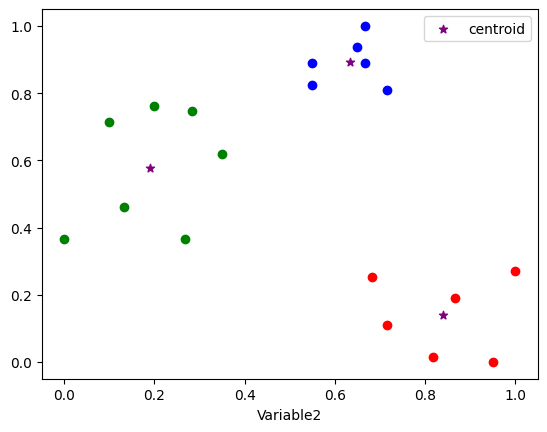

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Variable_1,df1.Variable_2,color = 'green')
plt.scatter(df2.Variable_1,df2.Variable_2,color = 'red')
plt.scatter(df3.Variable_1,df3.Variable_2,color = 'blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*',label= 'centroid')
plt.xlabel('Variable1')
plt.xlabel('Variable2')
plt.legend()

In [25]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df[['Variable_1','Variable_2']])
  sse.append(km.inertia_)

In [26]:
sse

[3.6220842450040447,
 1.425040861548798,
 0.4696788203817683,
 0.4114508872332002,
 0.22081527672797507,
 0.18378810783572685,
 0.1380683631477282,
 0.12635466532291925,
 0.1036054421768707]

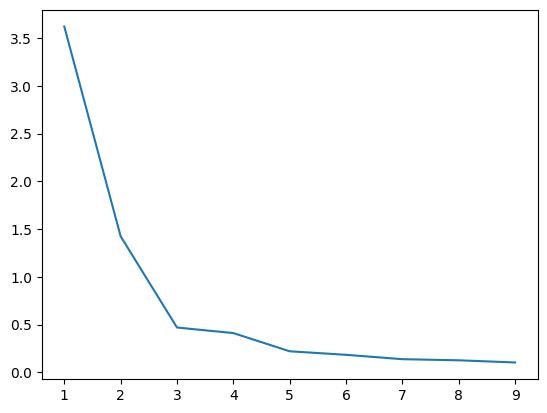

In [27]:
plt.plot(k_rng,sse)